## ZeroMinView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@465e45d7

This `Op` wraps the `Views.zeroMin()` method of ImgLib2, [translating](https://en.wikipedia.org/wiki/Translation_(geometry)) any image that the upper left corner of the output image is at the origin. Let's see how it is called:

In [2]:
ij.op().help('zeroMinView')

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.zeroMinView.DefaultZeroMinView(
		RandomAccessibleInterval in)

All that we need is an image that is not centered. Let's use [`translateView`] to offset an image:

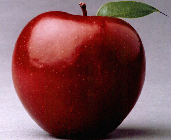

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/apple.tif")

//randomly offset the image in width and height
Random r = new Random()

translation = [r.nextInt(100), r.nextInt(100), 0] as long[]
    
translated = ij.op().run("translateView", input, translation)

ij.notebook().display(translated)

Let's check that the minimum is **not** at `[0, 0, 0]`:

In [4]:
"minimum of translated image: (" + translated.min(0) + ", " + translated.min(1) + ", 0)"

minimum of translated image: (82, 79, 0)

Now that we have a translated image, let's move it back to `[0, 0, 0]`:

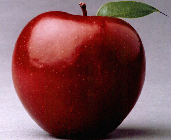

In [5]:
zeroMin = ij.op().run("zeroMinView", translated)

ij.notebook().display(zeroMin)

Note that the image data itself did not change through these `Op` calls. The `Op`s only changed the coordinates of the data. Let's check the minimum again:

In [6]:
"minimum of zeroMin image: (" + zeroMin.min(0) + ", " + zeroMin.min(1) + ", 0)"

minimum of zeroMin image: (0, 0, 0)